<a href="https://colab.research.google.com/github/raqssoriano/sparcs_descriptive_2022/blob/main/sparcsdescriptive2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
### (1) Load the Data:

df = pd.read_csv("/content/sparcs2022_inpatient.csv")
print(df.head()) # print the first 5 rows
print(df) # print the entire dataframe
print(df.columns) # print the column names

<ipython-input-50-9ead55da1af8>:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/sparcs2022_inpatient.csv")


  Hospital Service Area Hospital County  Operating Certificate Number  \
0         New York City           Bronx                   7000006.000   
1         New York City           Bronx                   7000006.000   
2         New York City           Bronx                   7000006.000   
3         New York City           Bronx                   7000006.000   
4         New York City           Bronx                   7000006.000   

   Permanent Facility Id                                      Facility Name  \
0               3058.000  Montefiore Med Center - Jack D Weiler Hosp of ...   
1               3058.000  Montefiore Med Center - Jack D Weiler Hosp of ...   
2               3058.000  Montefiore Med Center - Jack D Weiler Hosp of ...   
3               3058.000  Montefiore Med Center - Jack D Weiler Hosp of ...   
4               1168.000       Montefiore Medical Center-Wakefield Hospital   

  Age Group Zip Code - 3 digits Gender                    Race  \
0  50 to 69         

In [51]:

#### -->Cleaning the data:
## remove all whitespace, lower case, replace space with underscore from column names:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')
df_len = len(df)
print(df_len)


df.total_charges = df.total_charges.astype(str).apply(lambda x: x.replace(',', ''))
df.total_costs = df.total_costs.astype(str).apply(lambda x: x.replace(',', ''))

2103433


In [52]:
##-->Convert the Necessary Categories-Numeric:

df['length_of_stay'] = pd.to_numeric(df['length_of_stay'], errors='coerce')
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df['total_costs'] = pd.to_numeric(df['total_costs'], errors='coerce')

In [53]:

##-->Count NaN for Total Charges and Total Costs:
df['length_of_stay'].isna().sum()
df['total_charges'].isna().sum()
df['total_costs'].isna().sum()


0

In [54]:

## (2) Explore the Necessary Data Columns:

df = df[['age_group', 'length_of_stay', 'total_charges', 'total_costs', 'type_of_admission', 'gender']]
print(df.head()) # print the first 5 rows
print(df.tail()) # print the last 5 rows
print(df) # print the entire dataframe


  age_group  length_of_stay  total_charges  total_costs type_of_admission  \
0  50 to 69           3.000      51514.620     7552.540         Emergency   
1  18 to 29           1.000      25370.860     3469.550         Emergency   
2  18 to 29           2.000      23876.780     6180.330            Urgent   
3  18 to 29           2.000      43319.050    12588.930          Elective   
4  18 to 29           4.000      40266.230    10355.990         Emergency   

  gender  
0      F  
1      M  
2      F  
3      F  
4      M  
        age_group  length_of_stay  total_charges  total_costs  \
2103428  18 to 29             NaN    2377797.950   892866.030   
2103429  50 to 69          21.000     262687.100   236947.700   
2103430  50 to 69           3.000      67719.070    61083.620   
2103431  30 to 49           8.000      66464.560    59952.030   
2103432   0 to 17           2.000      21356.580    19263.960   

        type_of_admission gender  
2103428         Emergency      M  
2103429   

In [55]:


## --> Explore each Categorical Variable:

# ➤Age Group Distribution:
age_group = df['age_group'].value_counts()
print(age_group)

age_group
70 or Older    644330
50 to 69       566245
30 to 49       404692
0 to 17        302312
18 to 29       185854
Name: count, dtype: int64


<ipython-input-56-0db48e5ca116>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group.index, y=age_group.values, palette='pink')


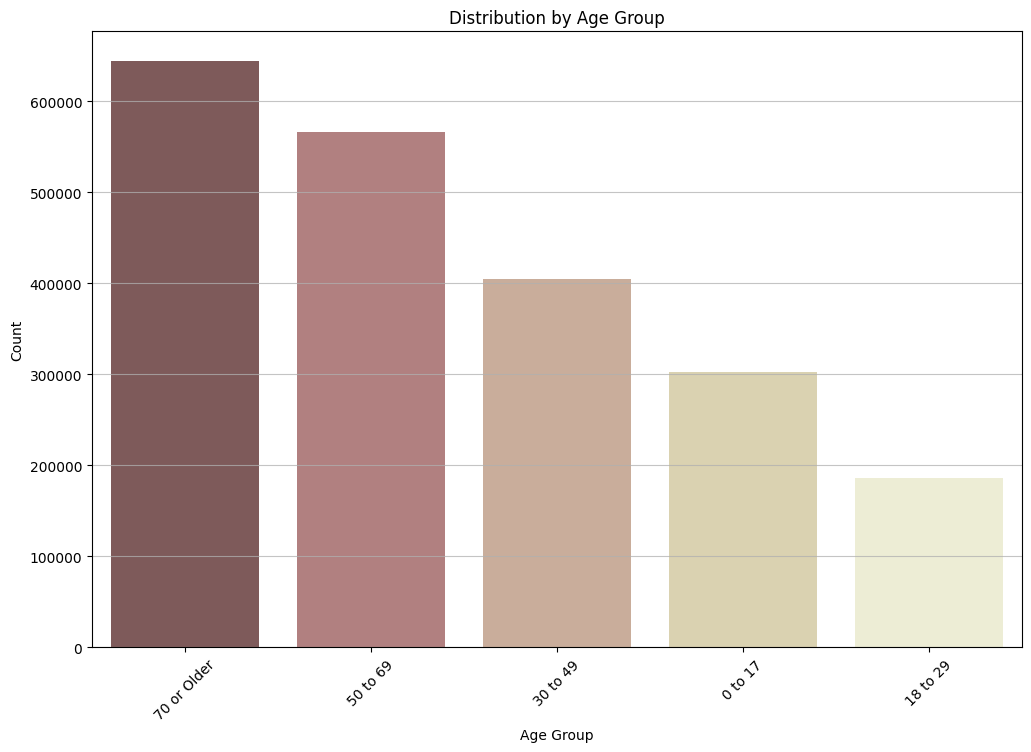

In [56]:

# ★Age Group Bar Plot:

plt.figure(figsize=(12, 8))
sns.barplot(x=age_group.index, y=age_group.values, palette='pink')
plt.title('Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [73]:

# ➤Gender Distribution:

gender = df['gender'].value_counts()
print(gender)

gender
F    1151016
M     952158
U        259
Name: count, dtype: int64


<ipython-input-74-01d485aa9fba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender.index, y=gender.values, palette='Blues')


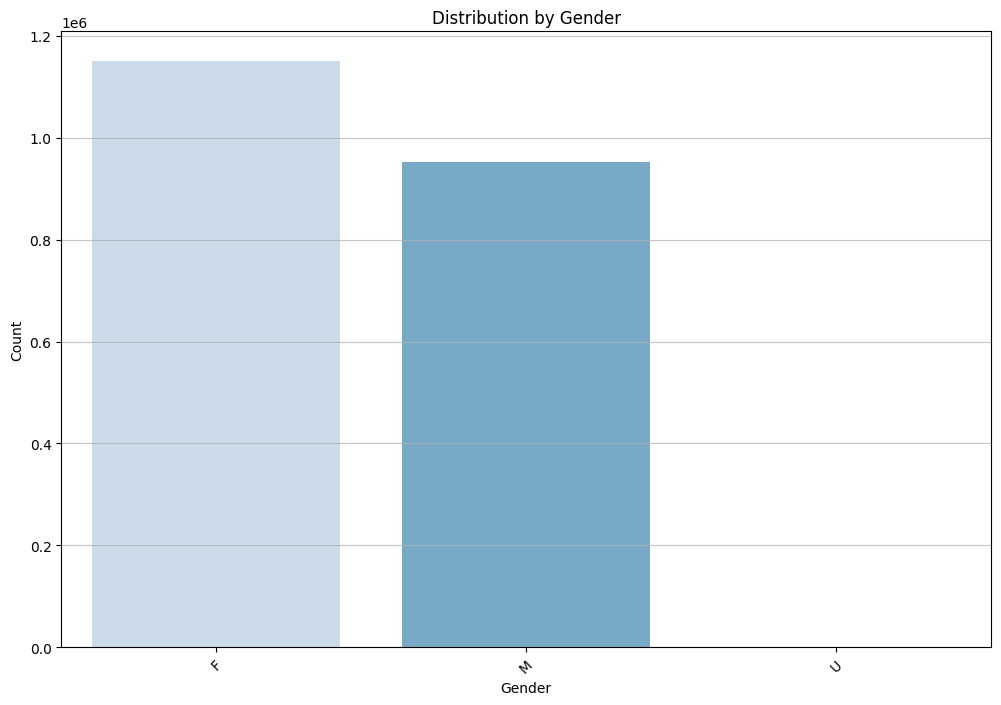

In [74]:

# ★Gender Bar Plot:

plt.figure(figsize=(12, 8))
sns.barplot(x=gender.index, y=gender.values, palette='Blues')
plt.title('Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [75]:

# ➤Type of Admission Distribution:

admissiontype = df['type_of_admission'].value_counts()
print(admissiontype)

type_of_admission
Emergency        1394328
Elective          356005
Newborn           198913
Urgent            145107
Trauma              7312
Not Available       1768
Name: count, dtype: int64


<ipython-input-78-cb77b9b4aaac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admissiontype.index, y=admissiontype.values, palette='pink')


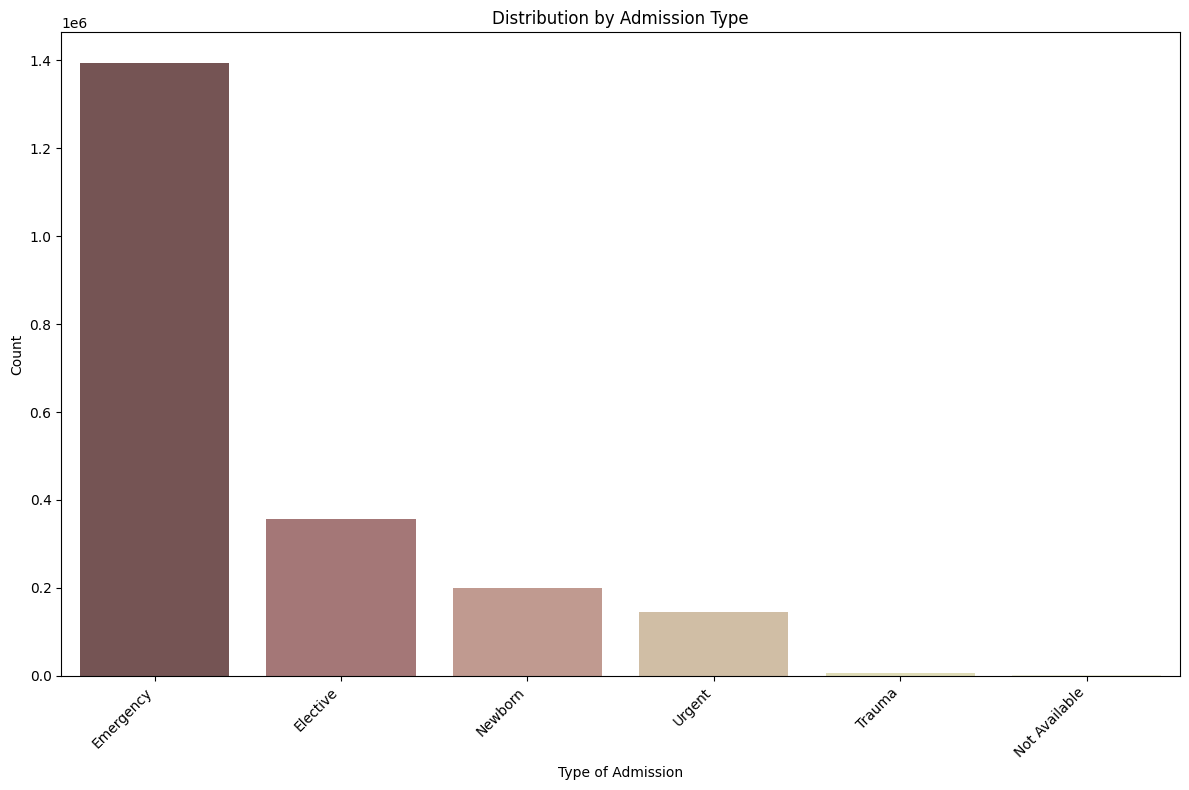

In [78]:

# ★Type of Admission Bar Plot:

plt.figure(figsize=(12, 8))
sns.barplot(x=admissiontype.index, y=admissiontype.values, palette='pink')
plt.title('Distribution by Admission Type')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [79]:


## -->Exploring Other Categorical Variable: [Length of Stay, Total Charges, Total Costs, and Type of Admission]

# ➤Length of Stay:
df['length_of_stay'].value_counts()


,count
length_of_stay,
2.000,460710
1.000,377177
3.000,310554
4.000,199596
5.000,141226
...,...
118.000,52
114.000,52
119.000,47


In [80]:

# ➤Total Charges:
df['total_charges'].value_counts()

,count
total_charges,
3614.000,403
26540.920,350
11472.720,293
24338.750,270
18743.010,260
...,...
185034.120,1
169111.890,1
309604.420,1


In [81]:

# ➤Total Costs:
df['total_costs'].value_counts()

,count
total_costs,
1630.840,401
9948.290,351
3053.340,293
8083.830,270
2985.190,268
...,...
21670.300,1
41585.170,1
8073.020,1


In [82]:

# ➤Type of Admission:
df['type_of_admission'].value_counts()

,count
type_of_admission,
Emergency,1394328
Elective,356005
Newborn,198913
Urgent,145107
Trauma,7312
Not Available,1768


In [83]:

## change default display options to not display exponential notation but float
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [84]:

### (3) Perform Descriptive Statistics:

## Descriptive Statistics for the Entire Dataframe:
descriptive = df[['length_of_stay', 'total_charges', 'total_costs']].describe()
print(descriptive)


       length_of_stay  total_charges  total_costs
count     2101330.000    2103433.000  2103433.000
mean            5.716      77898.212    23426.721
std             8.094     158386.732    49987.385
min             1.000          0.000        0.000
25%             2.000      20444.020     6369.180
50%             3.000      40712.490    12262.920
75%             6.000      81906.480    24644.160
max           119.000   15805656.710  8242868.770


In [85]:

length_of_stay = df['length_of_stay'].mean()
print(f"Average Length of Stay: {length_of_stay:.2f} days")

Average Length of Stay: 5.72 days


In [86]:

## Descriptive Statistics for each Categorical Data:

descriptive = df['length_of_stay'].describe()
print(descriptive)

descriptive = df['total_charges'].describe()
print(descriptive)

descriptive = df['total_costs'].describe()
print(descriptive)


count   2101330.000
mean          5.716
std           8.094
min           1.000
25%           2.000
50%           3.000
75%           6.000
max         119.000
Name: length_of_stay, dtype: float64
count    2103433.000
mean       77898.212
std       158386.732
min            0.000
25%        20444.020
50%        40712.490
75%        81906.480
max     15805656.710
Name: total_charges, dtype: float64
count   2103433.000
mean      23426.721
std       49987.385
min           0.000
25%        6369.180
50%       12262.920
75%       24644.160
max     8242868.770
Name: total_costs, dtype: float64


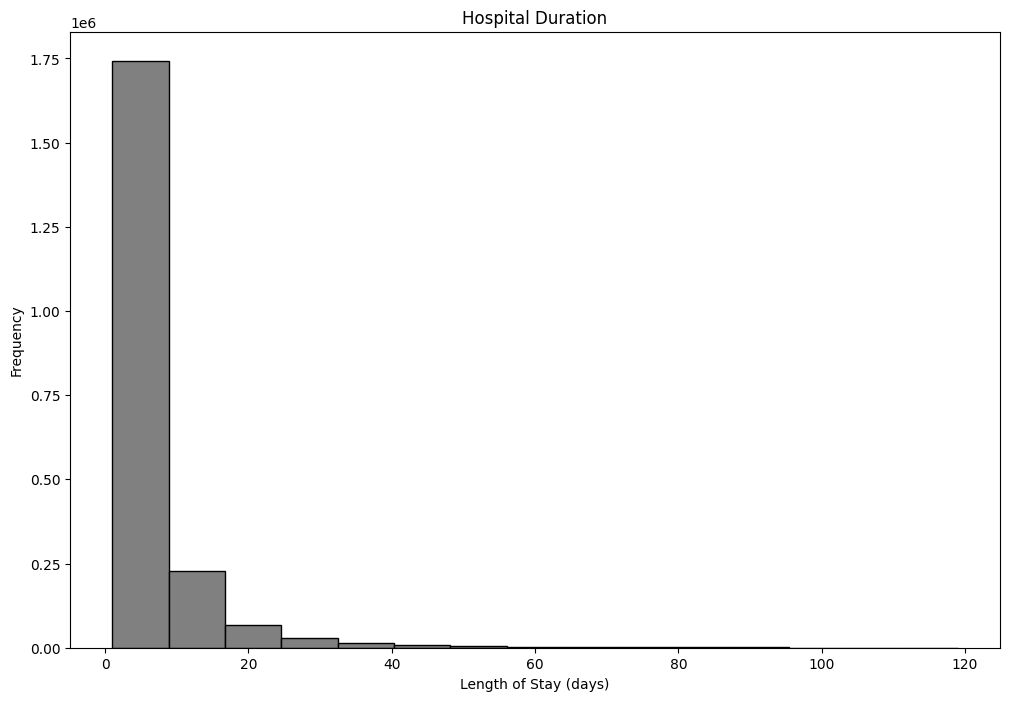

In [87]:

### (4) Data Visualization:

## Histogram of Length of Stay: Distribution of hospital stay durations.


plt.figure(figsize=(12, 8))
plt.hist(df['length_of_stay'], bins=15, color='grey', edgecolor='black')
plt.title('Hospital Duration')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

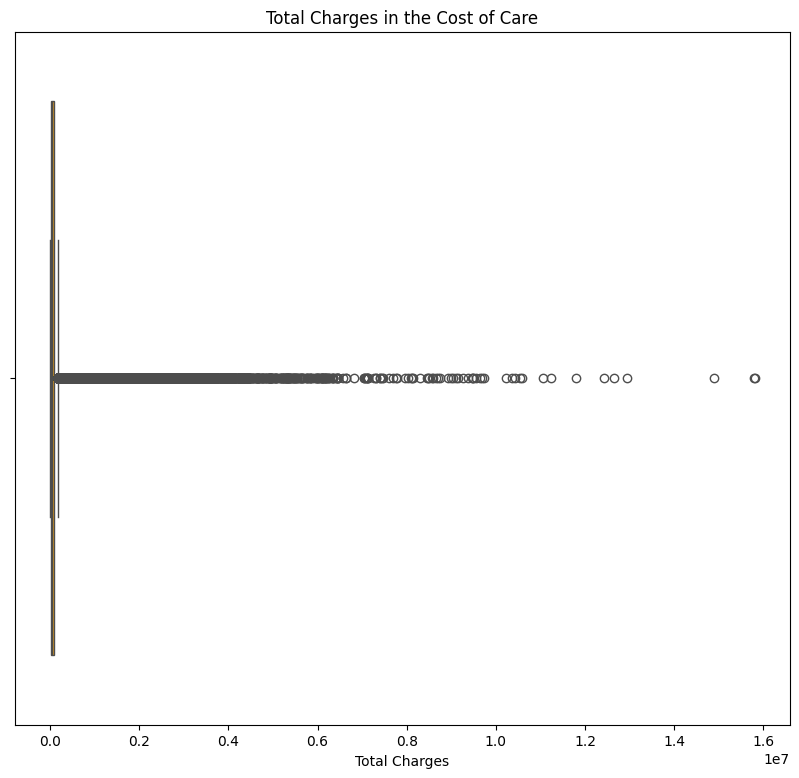

In [88]:

## Boxplot for Total Charges: Potential outliers in the cost of care.


plt.figure(figsize=(10, 9))
sns.boxplot(x=df['total_charges'], color='orange')
plt.title('Total Charges in the Cost of Care')
plt.xlabel('Total Charges')
plt.show()


<ipython-input-89-d601c37f10ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admissiontype.index, y=admissiontype.values, palette='pink')


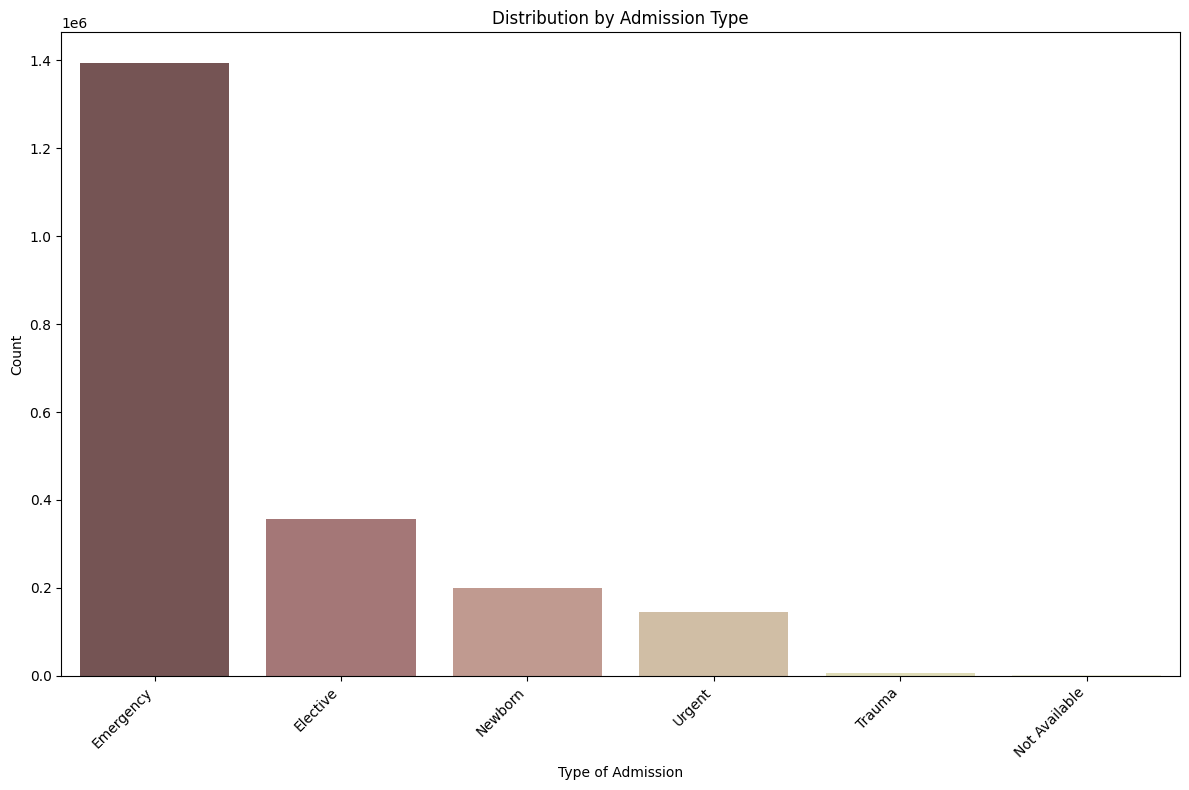

In [89]:

## Bar Plot for Type of Admission: Provides insights into the frequencies of different reasons of admission.

admissiontype = df['type_of_admission'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=admissiontype.index, y=admissiontype.values, palette='pink')
plt.title('Distribution by Admission Type')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [90]:

### (5) Missing Data:

## -->Check for missing data (each column):
missingdata = df.isnull().sum()
print(missingdata)

age_group               0
length_of_stay       2103
total_charges           0
total_costs             0
type_of_admission       0
gender                  0
dtype: int64


In [91]:
df_len_of_stay = df['length_of_stay'].isna().sum()
print(df_len_of_stay)

2103


In [92]:
df_total_charges = df['total_charges'].isna().sum()
print(df_total_charges)

0


In [94]:
df_total_costs = df['total_costs'].isna().sum()
print(df_total_costs)

0


In [109]:
## -->How to handle missing data:

## (a.) Drop Rows with Missing Data in Specific Columns:

drop = df.dropna()
print("Data after dropping rows with missing data:\n", drop.isnull().sum())


Data after dropping rows with missing data:
 age_group            0
length_of_stay       0
total_charges        0
total_costs          0
type_of_admission    0
gender               0
dtype: int64


In [96]:

## (b.) Fill Missing Data (Mean): for numeric columns

#filled_mean = df.fillna(df.mean())
#print("Data after filling missing data with mean:\n", filled_mean.isnull().sum())



This part took forever to load. I couldn't wait for it to finish.

In [97]:

## (c) Verify missing data was handled:

print("Data after filling missing data with mean:\n", df.isnull().sum())

Data after filling missing data with mean:
 age_group               0
length_of_stay       2103
total_charges           0
total_costs             0
type_of_admission       0
gender                  0
dtype: int64


If #96 is successful, I could run this code, which will generate a result showing that filling the missing data is successful.

In [98]:

### (6) Summary Report:

# ★What is the Average Length of Stay?

length_of_stay = df['length_of_stay'].mean()
print(f"Average Length of Stay: {length_of_stay:.2f} days")


Average Length of Stay: 5.72 days


In [112]:

# ★Total Cost Variation (Age Group)★

age_group_cost = df.groupby('age_group')['total_costs'].mean()
print(f"Total Cost by Age Group:\n{age_group_cost}")

Total Cost by Age Group:
age_group
0 to 17       14081.991
18 to 29      17112.340
30 to 49      20196.571
50 to 69      29184.144
70 or Older   26601.618
Name: total_costs, dtype: float64


<ipython-input-113-a34cc13188f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_cost.index, y=age_group_cost.values, palette='Purples')


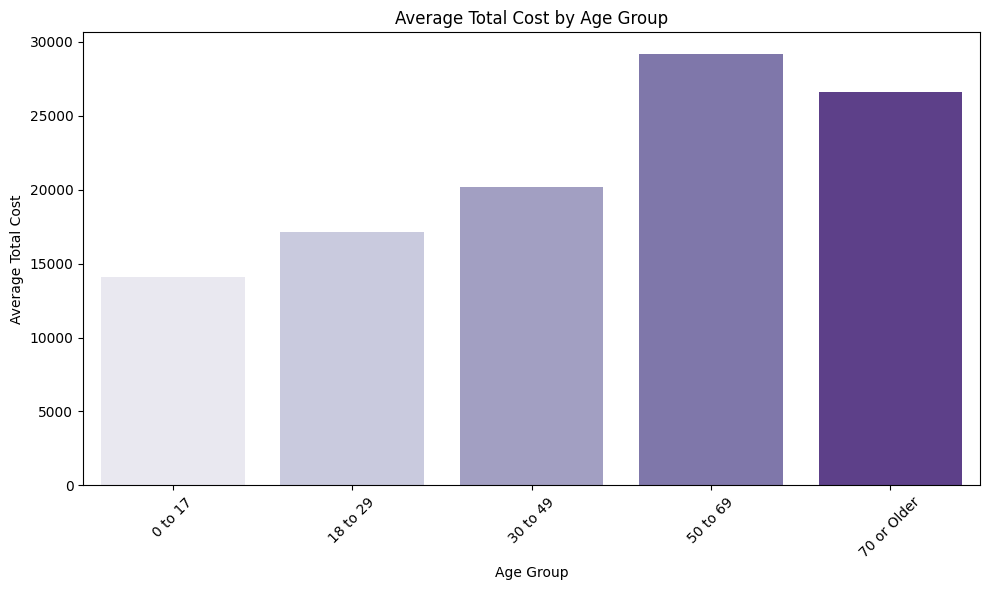

In [113]:
# Total Cost by Age Group Visualization:

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_cost.index, y=age_group_cost.values, palette='Purples')
plt.title('Average Total Cost by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Obviously, the cost of care tends to increase with age, particularly between 50 and 69 age group, while there's a slight decrease of total cost for those at the age of 70 and older.**

In [101]:

# ★Total Cost Variation (Type of Admission)★

admissiontype_cost = df.groupby('type_of_admission')['total_costs'].mean()
print("Total Cost by Type of Admission:\n", admissiontype_cost)


Total Cost by Type of Admission:
 type_of_admission
Elective        27472.549
Emergency       23719.174
Newborn          9498.223
Not Available   20045.260
Trauma          35986.670
Urgent          29192.053
Name: total_costs, dtype: float64


<ipython-input-107-d4ae3fc3c16e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admissiontype_cost.index, y=admissiontype_cost.values, palette='Purples')


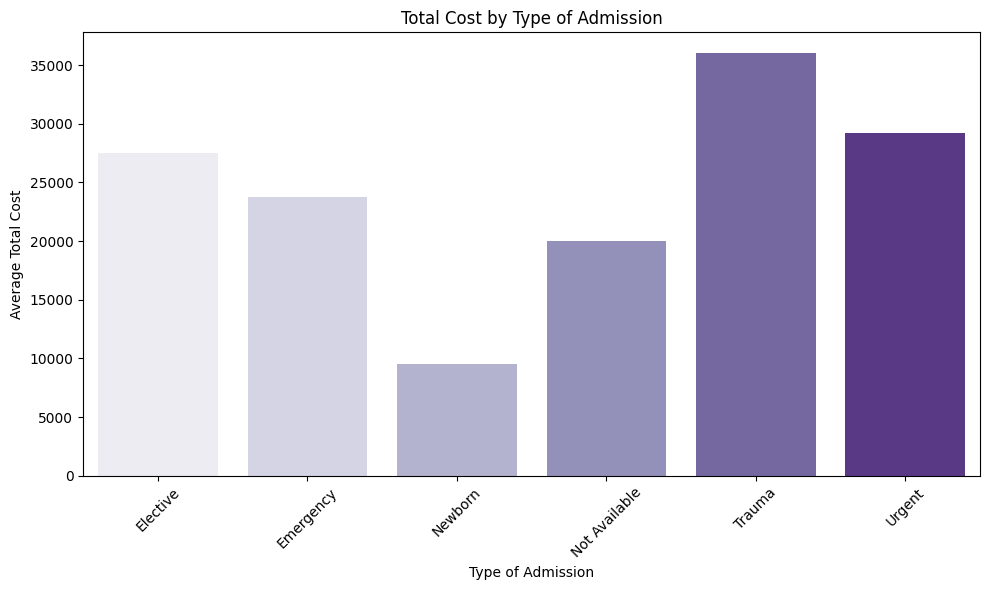

In [107]:
# Total Cost by Type of Admission Visualization:

plt.figure(figsize=(10, 6))
sns.barplot(x=admissiontype_cost.index, y=admissiontype_cost.values, palette='Purples')
plt.title('Total Cost by Type of Admission')
plt.xlabel('Type of Admission')
plt.ylabel('Average Total Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* TRAUMA admissions - highest total cost; it involves serious and life-threatening injuries, which require specialized care and may include include advanced imaging such as MRI, ultrasound, and xrays. It often involves the use of operating rooms (OR) and surgical equipment. This can result in longer stays depending on the severity of the injuries sustained by patients.

* NEWBORN admissions - lowest total cost; healthy newborns may require shorter stay in the hospital, which is likely why it gets the lowest total cost, as most can be discharged once deemed safe.




In [105]:

# ★Noticeable Trends★

admissiontype = df['type_of_admission'].value_counts()
print(admissiontype)


type_of_admission
Emergency        1394328
Elective          356005
Newborn           198913
Urgent            145107
Trauma              7312
Not Available       1768
Name: count, dtype: int64


<ipython-input-108-0c32c79a9015>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admissiontype.index, y=admissiontype.values, palette='pink')


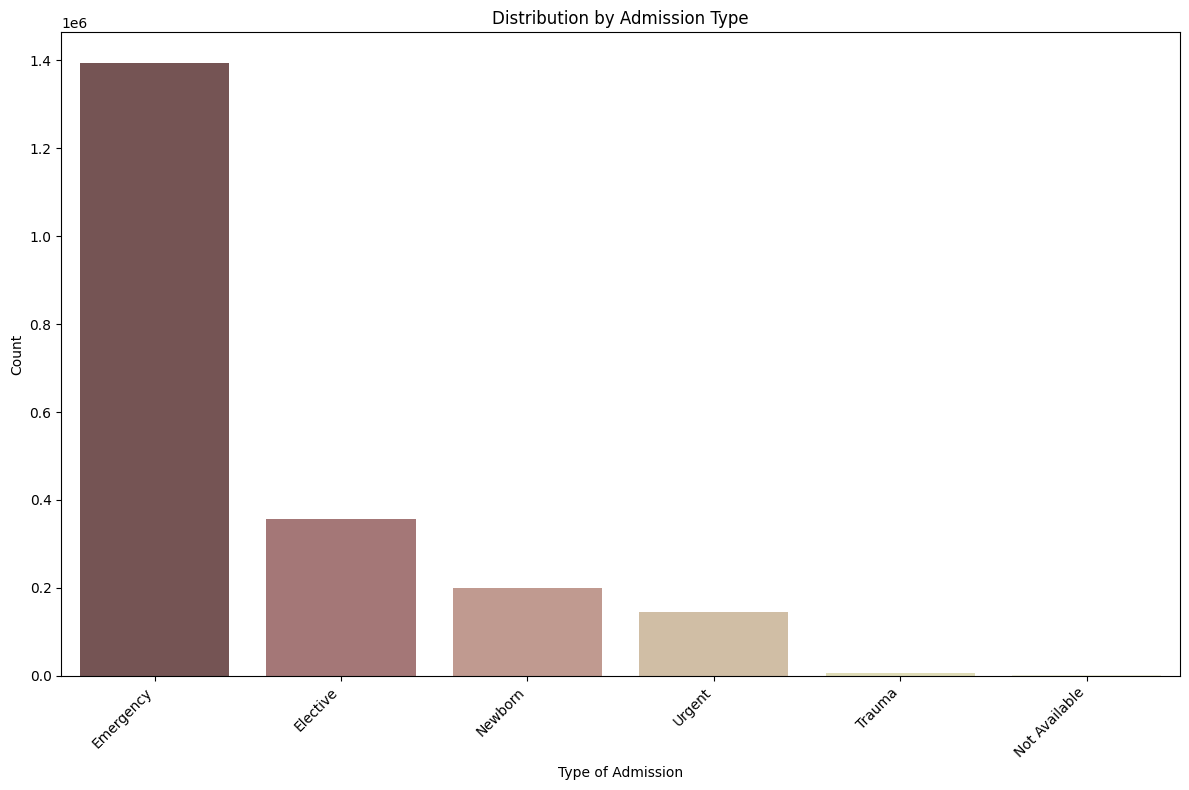

In [108]:
admissiontype = df['type_of_admission'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=admissiontype.index, y=admissiontype.values, palette='pink')
plt.title('Distribution by Admission Type')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* EMERGENCY ADMISSION (1,394,328) - This is the highest volume of admission rates among the list. This could mean that acute care requires special attention, particularly in NY, which is the focus of this health dataset. It is essential to note the age group and the location or area of the contributing admission rates, as this could provide valuable insights on where the private/public health officials should allocate most of their financial support. Additionally, this data is crucial for hospitals to prepare in allocating beds, staffing, and other necessary resources to better meet the needs of the public or patients.

* TRAUMA ADMISSIONS (7,312) - This is the second lowest admission rate in NY within this health dataset. As a former ED nurse, I am not surprised this is one of the lowest, as not all hospitals are considered level 1 trauma centers or may not even be trauma centers. This means patients who needed specialized care due to life-threatening injuries may require transfer to trauma center hospitals.